# Notebook to look at Nobel prize winners

In [2]:
#standard imports
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print('Setup Complete')

Setup Complete


In [3]:
#read in data and print first rows
df = pd.read_csv('nobel_final.csv')
df.head()

,firstname,surname,born_country_code,died_country_code,gender,year,category,share,name_of_university,city_of_university,country_of_university,born_month,age,age_get_prize
0,Wilhelm Conrad,Röntgen,DE,DE,male,1901,physics,1,Munich University,Munich,Germany,Mar,78,56
1,Hendrik A.,Lorentz,NL,NL,male,1902,physics,2,Leiden University,Leiden,the Netherlands,Jul,75,49
2,Pieter,Zeeman,NL,NL,male,1902,physics,2,Amsterdam University,Amsterdam,the Netherlands,May,78,37
3,Henri,Becquerel,FR,FR,male,1903,physics,2,École Polytechnique,Paris,France,Dec,56,51
4,Pierre,Curie,FR,FR,male,1903,physics,4,École municipale de physique et de chimie indu...,Paris,France,May,47,44


<AxesSubplot:xlabel='born_country_code', ylabel='count'>

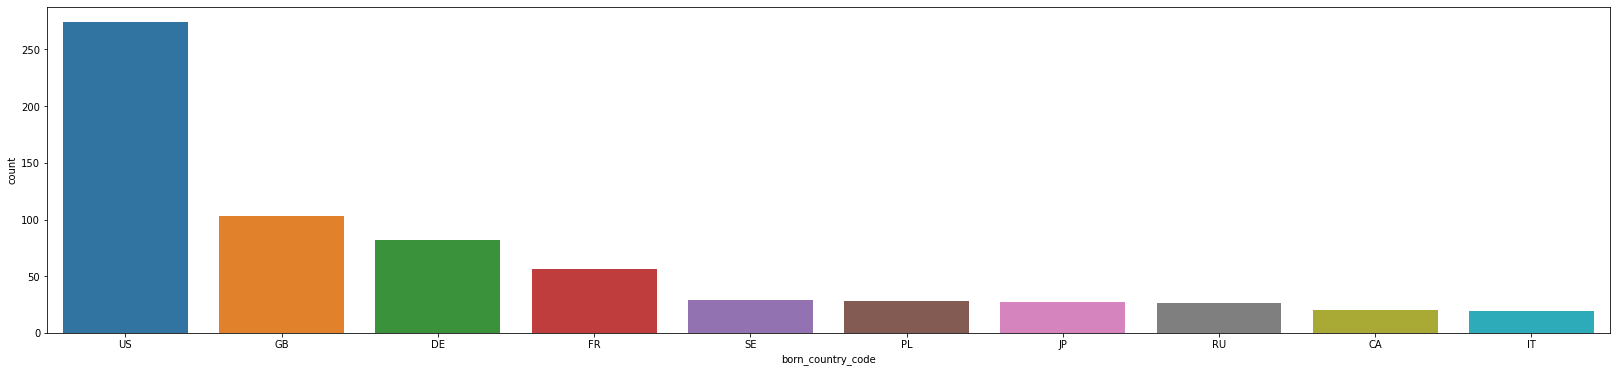

In [12]:
#Where are the majority of winners born
plt.figure(figsize=(28,6))
sns.countplot(x ='born_country_code', data = df, order = df['born_country_code'].value_counts().iloc[:10].index)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'USA'),
  Text(1, 0, 'United Kingdom'),
  Text(2, 0, 'Germany'),
  Text(3, 0, 'France'),
  Text(4, 0, 'Switzerland'),
  Text(5, 0, 'Japan'),
  Text(6, 0, 'Sweden'),
  Text(7, 0, 'the Netherlands'),
  Text(8, 0, 'USSR (now Russia)'),
  Text(9, 0, 'Denmark')])

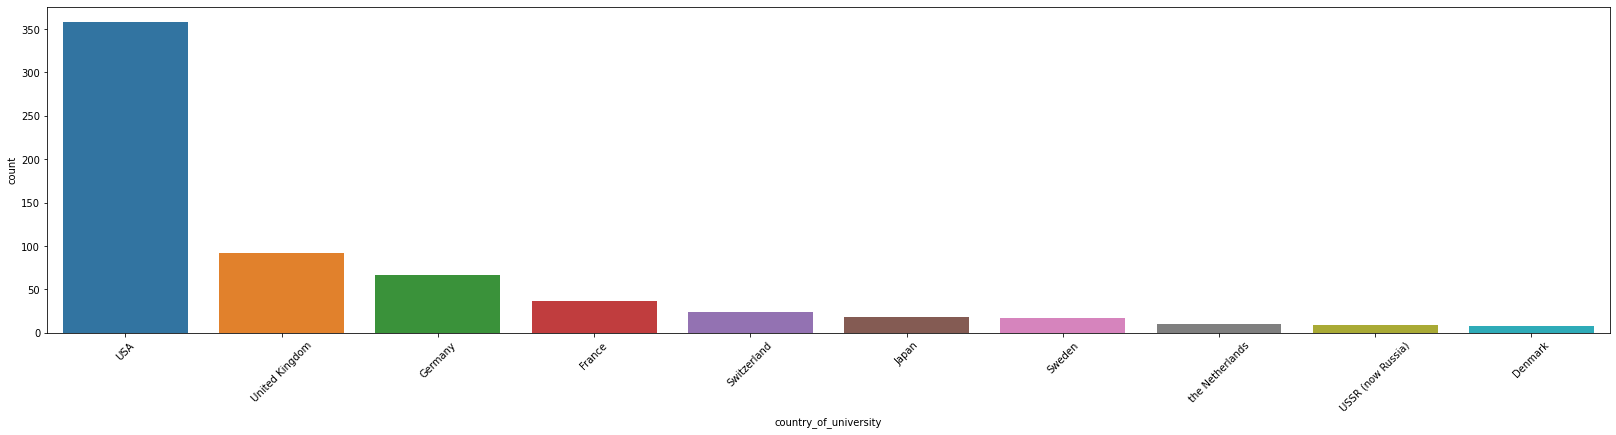

In [11]:
#Where did the majority of winners go to university
plt.figure(figsize=(28,6))
sns.countplot(x ='country_of_university', data = df, order = df['country_of_university'].value_counts().iloc[:10].index)
plt.xticks(rotation=45)

Text(0, 0.5, 'Birth')

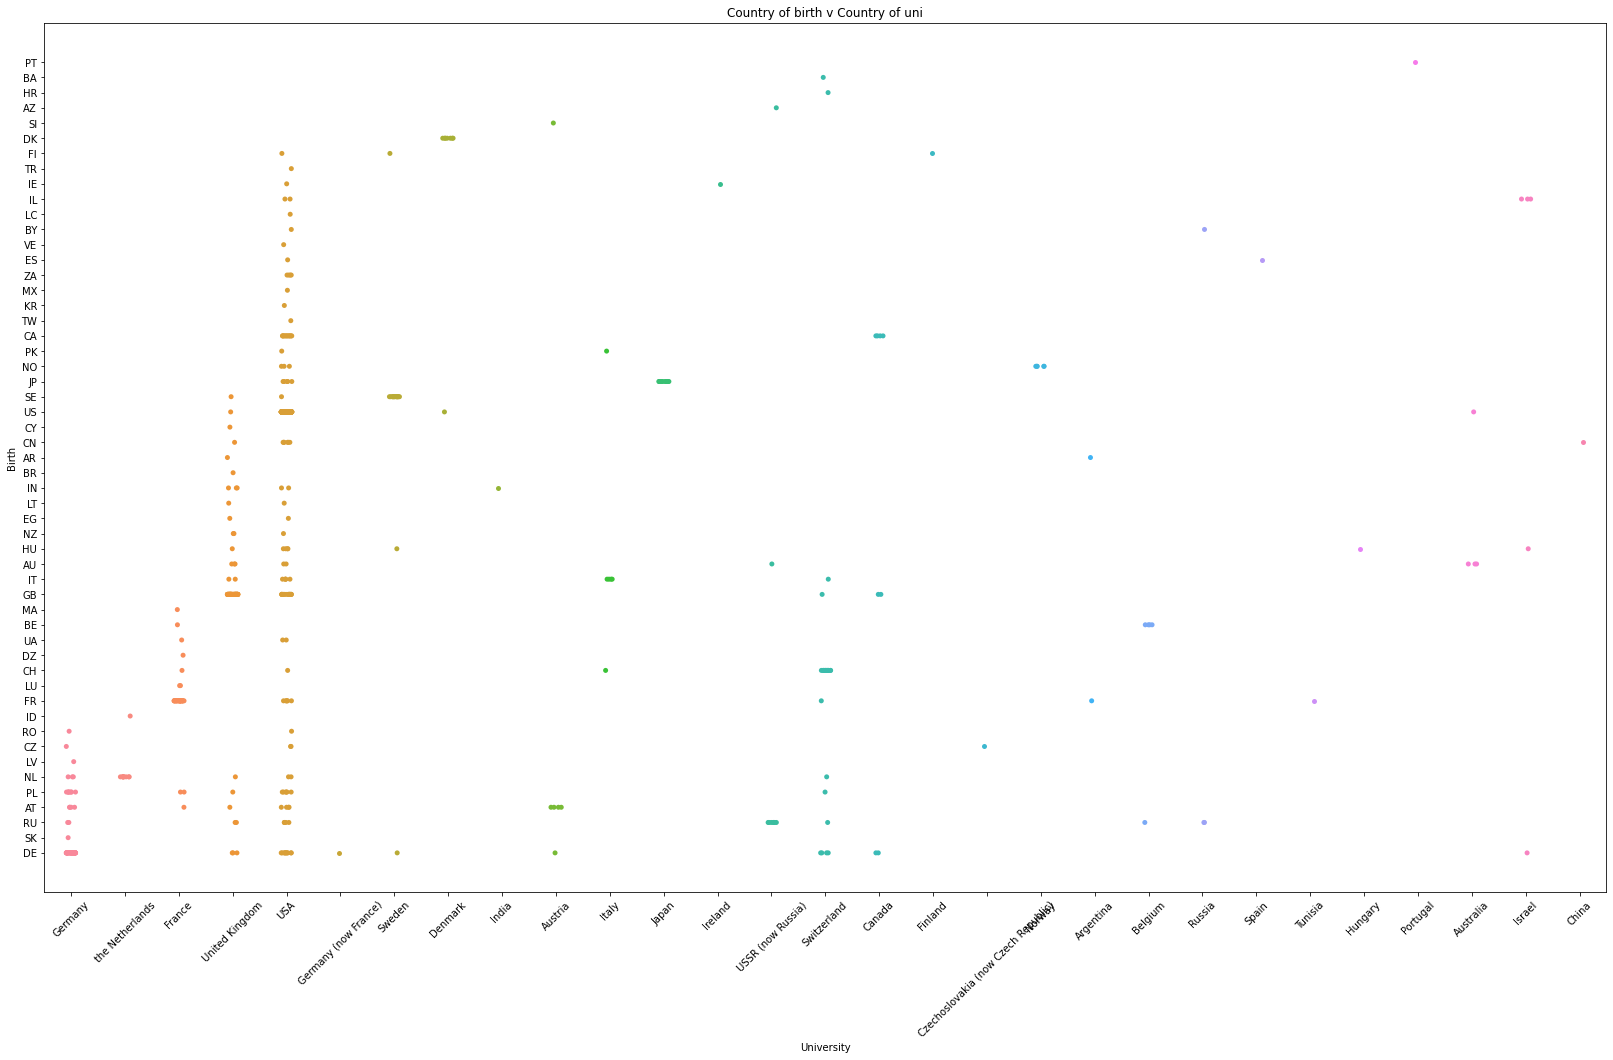

In [14]:
plt.figure(figsize=(28,16))
sns.stripplot(x=df['country_of_university'], y=df['born_country_code'])
plt.xticks(rotation=45)
plt.title("Country of birth v Country of uni")
plt.xlabel("University")
plt.ylabel("Birth")

<AxesSubplot:xlabel='gender', ylabel='count'>

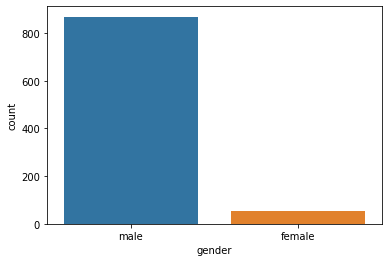

In [33]:
#what is the male to female ratio
sns.countplot(data = df, x = 'gender')

<AxesSubplot:xlabel='category', ylabel='count'>

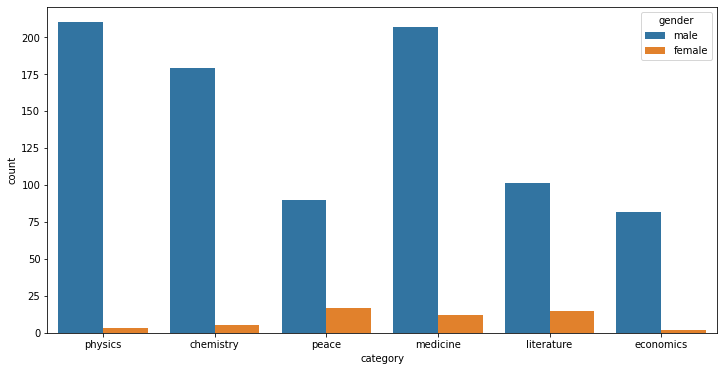

In [32]:
#what is the category split by gender
plt.figure(figsize=(12,6))
sns.countplot(data = df, x = 'category', hue = 'gender')

In [51]:
df['age_range'] = pd.cut(df['age_get_prize'], bins=8)
df['year_range'] = pd.cut(df['year'], bins=8, precision=0)

,firstname,surname,born_country_code,died_country_code,gender,year,category,share,name_of_university,city_of_university,country_of_university,born_month,age,age_get_prize,age_range,year_range
0,Wilhelm Conrad,Röntgen,DE,DE,male,1901,physics,1,Munich University,Munich,Germany,Mar,78,56,"(47.0, 57.0]","(1901.0, 1916.0]"
1,Hendrik A.,Lorentz,NL,NL,male,1902,physics,2,Leiden University,Leiden,the Netherlands,Jul,75,49,"(47.0, 57.0]","(1901.0, 1916.0]"
2,Pieter,Zeeman,NL,NL,male,1902,physics,2,Amsterdam University,Amsterdam,the Netherlands,May,78,37,"(27.0, 37.0]","(1901.0, 1916.0]"
3,Henri,Becquerel,FR,FR,male,1903,physics,2,École Polytechnique,Paris,France,Dec,56,51,"(47.0, 57.0]","(1901.0, 1916.0]"
4,Pierre,Curie,FR,FR,male,1903,physics,4,École municipale de physique et de chimie indu...,Paris,France,May,47,44,"(37.0, 47.0]","(1901.0, 1916.0]"


<AxesSubplot:xlabel='age_get_prize', ylabel='Count'>

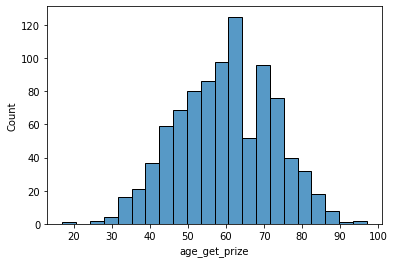

In [52]:
sns.histplot(df['age_get_prize'])

<AxesSubplot:xlabel='age_get_prize', ylabel='year_range'>

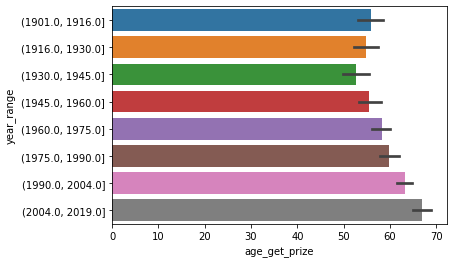

In [53]:
#age received award and gender
sns.barplot(x=df['age_get_prize'], y=df['year_range'])

In [35]:
#gender and country born (top 4)

In [36]:
#gender and country uni (top 4)

In [37]:
#those from top born and top uni

In [38]:
#age of award and category

In [39]:
#age of award and country born

In [40]:
#age of award and country uni

In [41]:
#country born and category

In [42]:
#country born and category

In [43]:
#how has gender, category, age changed over time
#bucket years to decades

In [ ]:
#what can we predict?